In [581]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [473]:
df_final = pd.read_csv('final.csv')

In [474]:
index = df_final['Unnamed: 0'].tolist()
df_final.drop('Unnamed: 0',inplace=True,axis = 1)
df_final.index = index

In [476]:
def average_rating_day(df, row, lst):
    avg = j = 0
    for i in range(len(df.columns)):
        avg += df.iloc[row, i]
        if (i + 1) % 8 == 0:
            lst.append(avg / 8)
            avg = 0
            j += 1
    if avg > 0:
        lst.append(avg / (i % 8 + 1))

In [477]:
def surf_rating(lst):
    
    if 1.7 <= lst[3] <= 3.5 and 12 <= lst[5] <= 15 and  11 <= lst[0] <= 19 and  360<= lst[4] <= 415:
        return 2  # Great day to surf
    elif lst[3] > 3.5 or lst[0] > 19 :
        return 3 # Dangerous day for surfing
    else:
        return 1  # Not a good day to surf


In [478]:
def avg_for_plot(df,lst):
    temp = []
    for i in range(len(df)):
        average_rating_day(df,i,temp)
        lst.append(temp)
        temp = []

In [479]:
def avg_per_list(big_lst,small_lst,index):
    for i in range(len(big_lst)):
        small_lst.append(big_lst[i][index])

In [480]:
rating_wave = []
temp = []
value = -1
for i in range(len(df_final)):
    average_rating_day(df_final,i,temp)
    value = surf_rating(temp)
    if i >= len(rating_wave):
        rating_wave.append(value)
    else:
        rating_wave[i] = value
    temp = []
    value = -1

In [481]:
df_final.insert(len(df_final.columns), "Surf Rating", rating_wave)

In [482]:
all_avg = []

In [483]:
avg_for_plot(df_final,all_avg)

In [484]:
wind_speed = []
wind_gusts =[] 
wave_height = []
wave_direction = []
wave_period = []
rating_day = []

In [485]:
avg_per_list(all_avg,wind_speed,0)
avg_per_list(all_avg,wind_gusts,2)
avg_per_list(all_avg,wave_height,3)
avg_per_list(all_avg,wave_direction,4)
avg_per_list(all_avg,wave_period,5)
avg_per_list(all_avg,rating_day,6)

In [595]:
X = np.array([wind_speed, wind_gusts, wave_height, wave_direction, wave_period]).T
y = np.array(rating_day)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
k_range = range(1, 30)
cv_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
optimal_k = k_range[np.argmax(cv_scores)]
model = KNeighborsClassifier(n_neighbors=optimal_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Optimal value of k: ", optimal_k)
print("Accuracy: ", accuracy)
print("Confusion matrix: \n", confusion)

C:\Users\Raz\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Raz\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

C:\Users\Raz\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Raz\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

Optimal value of k:  5
Accuracy:  0.89375
Confusion matrix: 
 [[123   3   1]
 [  4  10   1]
 [  6   2  10]]


C:\Users\Raz\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Raz\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

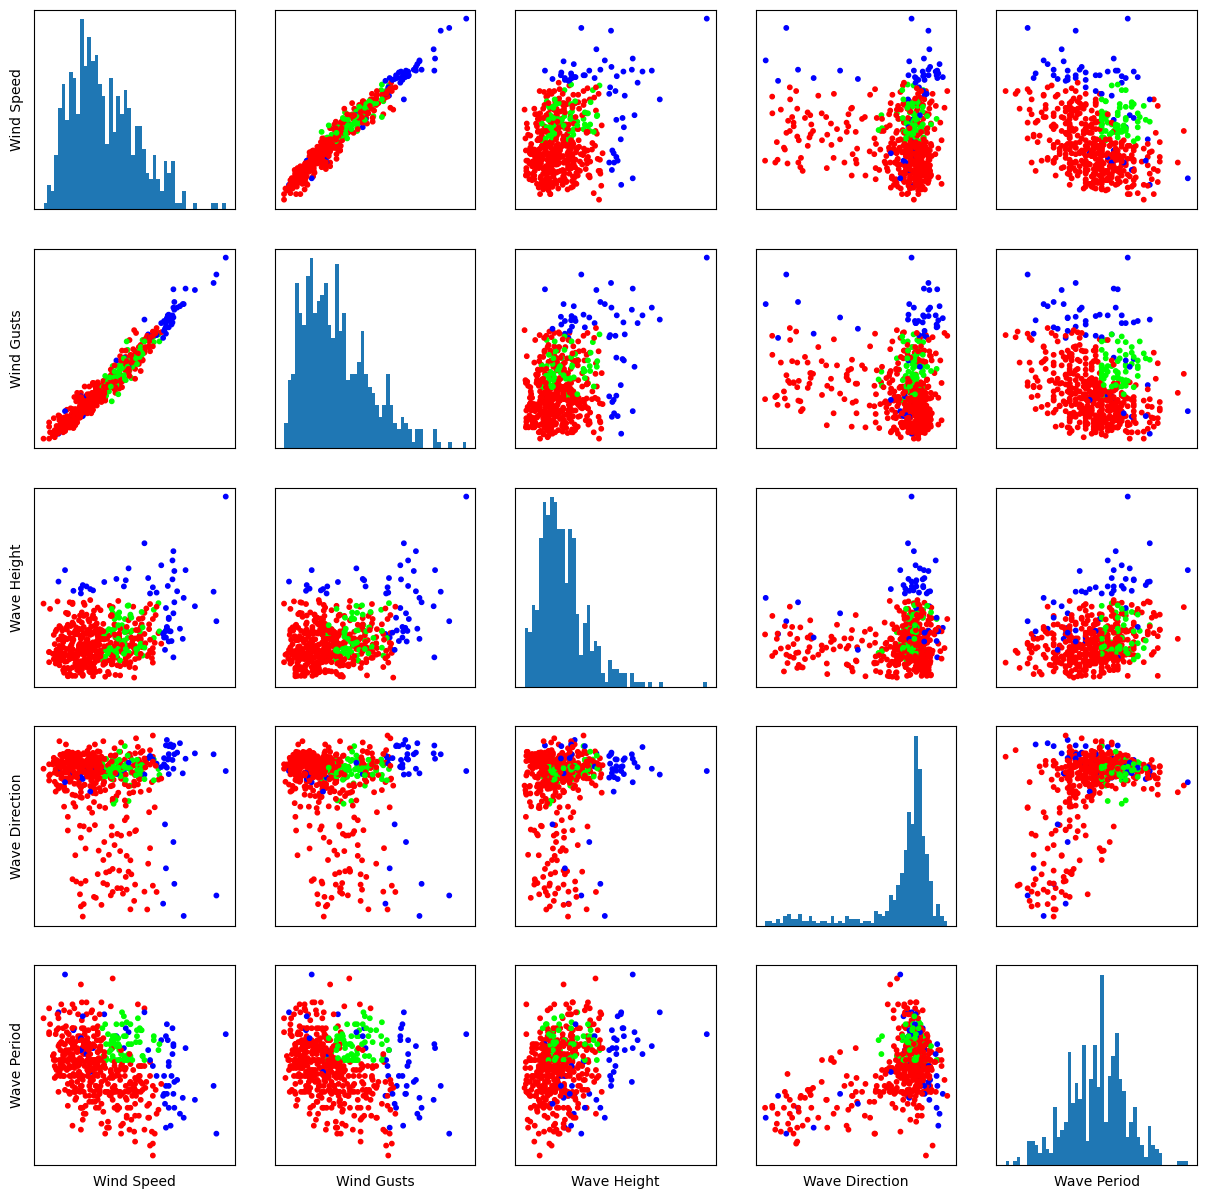

In [594]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
feature_labels = ['Wind Speed', 'Wind Gusts', 'Wave Height', 'Wave Direction', 'Wave Period']
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
feature_labels = ['Wind Speed', 'Wind Gusts', 'Wave Height', 'Wave Direction', 'Wave Period']
for i in range(5):
    axs[4, i].set_xlabel(feature_labels[i])
    axs[i, 0].set_ylabel(feature_labels[i])

for i in range(5):
    for j in range(5):
        if i == j:
            axs[i, j].hist(X[:, i], bins=50)
        else:
            axs[i, j].scatter(X[:, j], X[:, i], c=rating_day, cmap=cmap_bold, s=10)

        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])